In [1]:
import datetime, time, os
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
    
print('Using TensorFlow version: %s' % tf.__version__)

RSEED = 1337

Using TensorFlow version: 2.8.0


In [2]:
!pip install -q git+https://github.com/tensorflow/docs
    
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [3]:
# Import Data

#data = pd.read_csv('data/data_prep_reg.csv', index_col=[0]) # includes the statistics of the features only location D
data = pd.read_csv('data/data_prep_feat.csv', index_col=[0]) # includes all values as a new features only location D
#data = pd.read_csv('data/data_prep_reg_all.csv', index_col=[0]) # include the statistics of the features an all locations

print(f'Data: {data.shape}')

Data: (4990, 770)


In [4]:
#fillna
data = data.fillna(data.mean())

In [5]:
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.649250,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,0.759167,178.252679,0.896736,90.555833,20.491667,0.000,0.779958,177.704952,0.897390,90.531667
13,3,32.240851,29.608333,19.166667,23.151446,2.808773,7.889204,22.291667,10.441667,2.229,...,0.786333,101.535318,1.511667,90.554167,22.083333,2.229,0.915818,331.308648,1.970000,90.527500
15,3,72.717021,29.133333,17.516667,22.341529,3.161073,9.992384,21.683333,11.616667,13.588,...,0.871250,270.524749,0.454167,90.512500,19.716667,0.000,0.905083,231.191039,0.388333,90.477500
22,3,35.833571,30.558333,16.983333,22.401240,3.592899,12.908921,21.333333,13.575000,43.080,...,0.666833,178.252679,0.896736,90.239167,26.850000,0.000,0.642583,177.704952,0.897390,90.217500


In [6]:
columns_to_drop = list(data.columns)[2:44]
columns_to_drop.append('target')
columns_to_drop.append('location')

In [7]:
# = ['target', 'location', feature_stats]
# define features and target
X = data.drop(columns_to_drop, axis=1)
y = data.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, 
                                    random_state = RSEED) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 726)
y: (4990,)
X_train: (3493, 726)
y_train: (3493,)
X_test: (1497, 726)
y_test: (1497,)


In [8]:
X_train.head()

,newtemp0,newprecip0,newrel_humidity0,newwind_dir0,windspeed0,atmospherepressure0,newtemp1,newprecip1,newrel_humidity1,newwind_dir1,...,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
13500,19.775000,0.0,0.838083,324.758764,0.687500,90.472500,19.600000,0.0,0.856167,302.108490,...,0.960833,241.444055,0.367500,90.515000,23.341221,1.0,0.963333,193.867052,0.559167,90.512500
8672,19.358333,0.0,0.927500,304.130122,0.745000,90.329167,19.541667,0.0,0.899167,299.048574,...,0.885833,178.252679,0.896736,90.493333,19.083333,0.0,0.892750,177.704952,0.897390,90.475833
1509,23.075000,0.0,0.792833,60.592459,0.700000,90.690833,22.041667,0.0,0.835917,137.276479,...,0.828917,70.399998,2.082500,90.647500,21.391667,0.0,0.872583,123.593864,1.122500,90.755833
7952,28.300000,0.0,0.533333,20.530670,1.428333,90.226667,27.633333,0.0,0.539167,16.341283,...,0.866667,61.581591,0.442727,90.511667,20.827273,0.0,0.910909,177.704952,0.897390,90.514545
13557,23.391667,0.0,0.799583,107.678324,0.670833,90.881667,24.583333,0.0,0.775583,143.592868,...,0.702750,133.586469,0.820833,90.897500,26.783333,0.0,0.663583,127.686985,0.892500,90.835000


In [9]:
# pre selecting

N_VAL =  len(X_test)
N_TRAIN = len(X_train)
BATCH_SIZE = 96
STEPS_PER_EPOCH = N_TRAIN // BATCH_SIZE
EPOCHS = 2000

In [10]:
# preparation for Tensorboard

# Define path for new directory 
root_logdir = os.path.join(os.curdir, "my_logs")

# Define function for creating a new folder for each run
def get_run_logdir():
    run_id = time.strftime('run_%d_%m_%Y-%H_%M_%S')
    return os.path.join(root_logdir, run_id)
    
run_logdir = get_run_logdir()
#def get_callbacks():

def get_callbacks(name):
    return tf.keras.callbacks.TensorBoard(run_logdir+name, histogram_freq=1)

In [11]:
# checkpoint 

# Define path where checkpoints should be stored
checkpoint_path = "DNN/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 verbose=1) # Set verbose != 0 if you want output during training


In [12]:
# Plotting function for MSE
def plot_metric(history):
    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [13]:
# Plotting function for loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [14]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [23]:
def evaluate(model, model_history, X_test, y_test, X_train, y_train):
    # plot MSE history
    plot_metric(model_history)
    # plot loss history
    plot_loss(model_history)

    # evaluate the model:
    # Evaluate the small model on test set using .evaluate
    loss, mse = model.evaluate(X_test, y_test, verbose=2)
    print(f'Model MSE: {mse}')
    print('--------'*5)

    # Predict values for test set
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

    test_results['first model'] =  [rmse_train, rmse_test]

    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

    fig, ax = plt.subplots(1,2, figsize=(15, 5))

    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')


    ax[0].scatter(y_pred, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values TEST")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))

    ax[1].scatter(y_pred_train, y_train, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [-400, 350], color="#193251")
    ax[1].set_title("True vs. predicted values", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("true values Train")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[1].set_ylim((y_test.min()-40), (y_test.max()+40))
    pass

In [16]:
# Define dictionary to store results
training_history = {}
test_results = {}

In [17]:
def model_compile_and_fit(X, y, model, name, optimizer, max_epochs=30):
    # Get optimizer
    #optimizer=tf.keras.optimizers.Adam()

    # model.compile
    model.compile(optimizer=optimizer,
                metrics='mse', # [tf.keras.metrics.RootMeanSquaredError()]
                loss='mae')
    # model.fit
    training_history[name] = model.fit(X, 
                        y,
                        validation_split=0.2,
                        verbose=1,
                        steps_per_epoch=STEPS_PER_EPOCH,
                        epochs=EPOCHS, 
                        callbacks=get_callbacks(name))
    # return results
    return training_history[name]

In [18]:
with tf.device('/cpu:0'):
      u512_model = tf.keras.Sequential([
            tf.keras.layers.Dense(512,kernel_initializer = 'uniform', activation='relu', input_dim = 726),
            tf.keras.layers.Dense(1,kernel_initializer = 'uniform')
      ])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-04-11 09:11:52.937298: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-11 09:11:52.937402: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
with tf.device('/cpu:0'):
    u512_model_history = model_compile_and_fit(X=X_train, 
                                            y=y_train,
                                            model= u512_model,
                                            name='u512_model',
                                            optimizer='Adam', 
                                            max_epochs= EPOCHS )

Epoch 1/2000


2022-04-11 09:11:53.037499: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


36/36 [==============================] - 1s 13ms/step - loss: 23.8958 - mse: 1144.4963 - val_loss: 20.4034 - val_mse: 914.9477
Epoch 2/2000
36/36 [==============================] - 0s 10ms/step - loss: 22.3864 - mse: 997.7970 - val_loss: 30.5591 - val_mse: 1711.4431
Epoch 3/2000
36/36 [==============================] - 0s 12ms/step - loss: 21.4451 - mse: 954.8806 - val_loss: 21.5653 - val_mse: 1066.1001
Epoch 4/2000
36/36 [==============================] - 0s 9ms/step - loss: 21.4960 - mse: 943.5991 - val_loss: 26.7088 - val_mse: 1429.6956
Epoch 5/2000
36/36 [==============================] - 0s 8ms/step - loss: 21.7207 - mse: 962.4988 - val_loss: 28.1589 - val_mse: 1536.1184
Epoch 6/2000
36/36 [==============================] - 0s 8ms/step - loss: 21.3130 - mse: 925.5048 - val_loss: 20.7357 - val_mse: 972.4946
Epoch 7/2000
36/36 [==============================] - 0s 9ms/step - loss: 21.7623 - mse: 973.3553 - val_loss: 20.2471 - val_mse: 904.5154
Epoch 8/2000
36/36 [===================

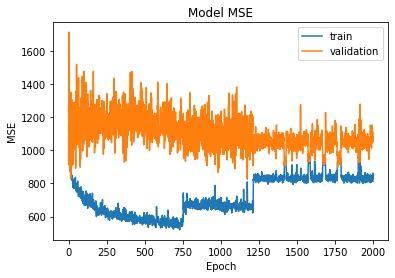

47/47 - 0s - loss: 22.7292 - mse: 1187.5923 - 116ms/epoch - 2ms/step
Model MSE: 1187.59228515625
----------------------------------------
RMSE: 34.46146047749807
RMSE: 29.046253050947517


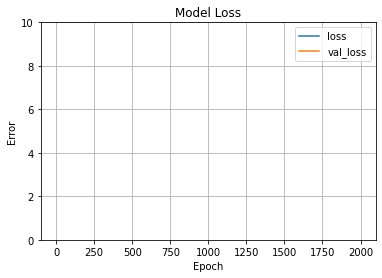

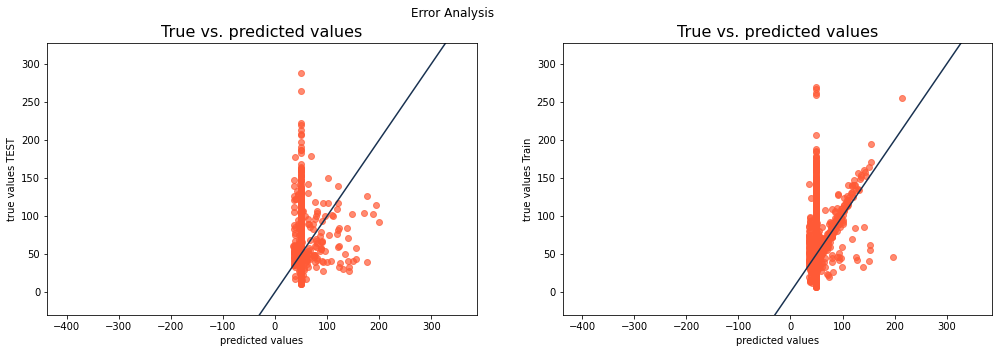

In [29]:
with tf.device('/cpu:0'):
    evaluate(u512_model, u512_model_history, X_test, y_test, X_train, y_train)

In [ ]:
# Save the entire small model as a SavedModel.
!mkdir -p saved_model
u512_model.save('saved_model/dnn_model')

# removing units

### 412


In [21]:
with tf.device('/cpu:0'):
    u412_model = tf.keras.Sequential([
            tf.keras.layers.Dense(412,kernel_initializer = 'uniform', activation='relu', input_dim = 726),
            tf.keras.layers.Dense(1,kernel_initializer = 'uniform')
      ])

with tf.device('/cpu:0'):
    u412_history = model_compile_and_fit(X=X_train, 
                                            y=y_train,
                                            model= u412_model,
                                            name='u412_model',
                                            optimizer='Adam', 
                                            max_epochs= EPOCHS )

Epoch 1/2000
36/36 [==============================] - 1s 9ms/step - loss: 24.7548 - mse: 1258.9790 - val_loss: 22.8025 - val_mse: 1155.8057
Epoch 2/2000
36/36 [==============================] - 1s 16ms/step - loss: 21.2576 - mse: 934.2032 - val_loss: 21.0393 - val_mse: 1010.9368
Epoch 3/2000
36/36 [==============================] - 0s 11ms/step - loss: 21.5507 - mse: 953.0367 - val_loss: 22.8377 - val_mse: 1157.6604
Epoch 4/2000
36/36 [==============================] - 0s 9ms/step - loss: 21.3587 - mse: 942.4703 - val_loss: 20.4608 - val_mse: 923.9323
Epoch 5/2000
36/36 [==============================] - 0s 12ms/step - loss: 20.8381 - mse: 897.4845 - val_loss: 24.2424 - val_mse: 1263.1392
Epoch 6/2000
36/36 [==============================] - 0s 8ms/step - loss: 20.7676 - mse: 905.8340 - val_loss: 24.3344 - val_mse: 1269.2372
Epoch 7/2000
36/36 [==============================] - 0s 7ms/step - loss: 21.3874 - mse: 934.2775 - val_loss: 24.0333 - val_mse: 1240.1594
Epoch 8/2000
36/36 [====

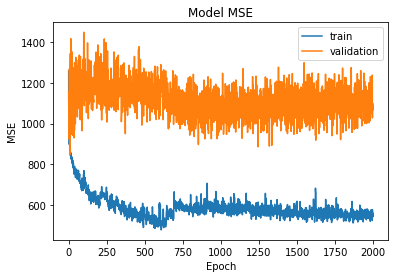

47/47 - 0s - loss: 22.5471 - mse: 1145.7961 - 73ms/epoch - 2ms/step
Model MSE: 1145.796142578125
----------------------------------------
RMSE: 33.84960930696723
RMSE: 27.70638213504598


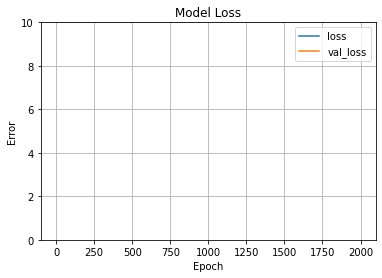

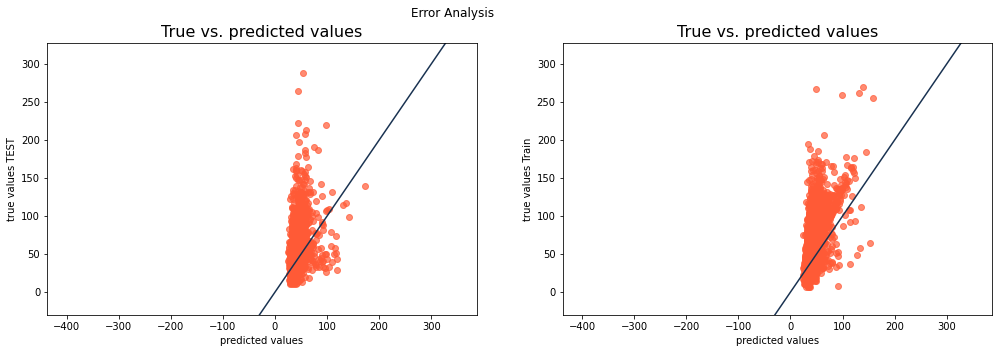

In [24]:
with tf.device('/cpu:0'):
    evaluate(u412_model, u412_history, X_test, y_test, X_train, y_train)

### 312 units


In [25]:
with tf.device('/cpu:0'):
      u312_model = tf.keras.Sequential([
            tf.keras.layers.Dense(312,kernel_initializer = 'uniform', activation='relu', input_dim = 726),

            tf.keras.layers.Dense(1,kernel_initializer = 'uniform')
      ])

with tf.device('/cpu:0'):
    u312_history = model_compile_and_fit(X=X_train, 
                                            y=y_train,
                                            model= u312_model,
                                            name='u312_model',
                                            optimizer='Adam', 
                                            max_epochs= EPOCHS )

Epoch 1/2000
36/36 [==============================] - 0s 7ms/step - loss: 26.9212 - mse: 1544.5776 - val_loss: 20.3207 - val_mse: 930.7690
Epoch 2/2000
36/36 [==============================] - 0s 5ms/step - loss: 21.3370 - mse: 941.2864 - val_loss: 20.7906 - val_mse: 985.3008
Epoch 3/2000
36/36 [==============================] - 0s 6ms/step - loss: 20.8332 - mse: 902.4913 - val_loss: 21.3299 - val_mse: 1037.8972
Epoch 4/2000
36/36 [==============================] - 0s 8ms/step - loss: 20.7911 - mse: 918.2471 - val_loss: 20.4033 - val_mse: 923.0337
Epoch 5/2000
36/36 [==============================] - 0s 6ms/step - loss: 20.8431 - mse: 900.3166 - val_loss: 20.3123 - val_mse: 872.0551
Epoch 6/2000
36/36 [==============================] - 0s 8ms/step - loss: 20.8792 - mse: 899.3076 - val_loss: 20.7452 - val_mse: 971.5791
Epoch 7/2000
36/36 [==============================] - 0s 5ms/step - loss: 20.5927 - mse: 895.8209 - val_loss: 20.9203 - val_mse: 984.7831
Epoch 8/2000
36/36 [============

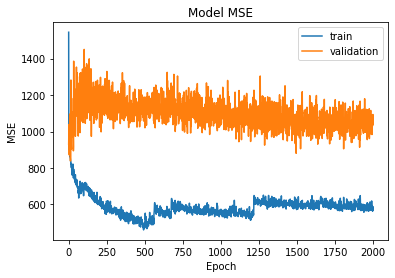

47/47 - 0s - loss: 22.0334 - mse: 1127.3527 - 112ms/epoch - 2ms/step
Model MSE: 1127.3526611328125
----------------------------------------
RMSE: 33.57607303831514
RMSE: 28.60112329345187


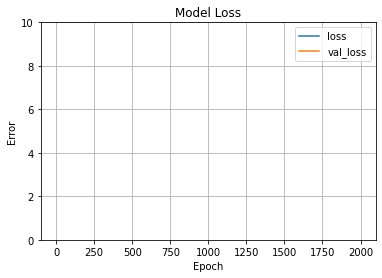

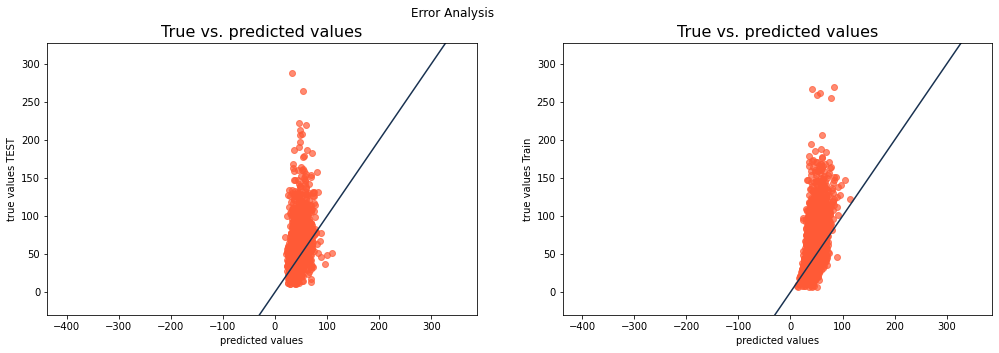

In [26]:
with tf.device('/cpu:0'):
    evaluate(u312_model, u312_history, X_test, y_test, X_train, y_train)

# 212


In [27]:
with tf.device('/cpu:0'):
      u212_model = tf.keras.Sequential([
            tf.keras.layers.Dense(212,kernel_initializer = 'uniform', activation='relu', input_dim = 726),
            tf.keras.layers.Dense(1,kernel_initializer = 'uniform')
      ])

with tf.device('/cpu:0'):
    u212_history = model_compile_and_fit(X=X_train, 
                                            y=y_train,
                                            model= u212_model,
                                            name='u212_model',
                                            optimizer='Adam', 
                                            max_epochs= EPOCHS )

Epoch 1/2000
36/36 [==============================] - 0s 4ms/step - loss: 47.1400 - mse: 4783.5317 - val_loss: 22.2587 - val_mse: 880.0021
Epoch 2/2000
36/36 [==============================] - 0s 4ms/step - loss: 21.0700 - mse: 910.4879 - val_loss: 20.8190 - val_mse: 954.6515
Epoch 3/2000
36/36 [==============================] - 0s 3ms/step - loss: 20.5552 - mse: 899.7772 - val_loss: 20.5560 - val_mse: 905.5925
Epoch 4/2000
36/36 [==============================] - 0s 4ms/step - loss: 20.2795 - mse: 876.3981 - val_loss: 21.3196 - val_mse: 1024.8805
Epoch 5/2000
36/36 [==============================] - 0s 7ms/step - loss: 20.1078 - mse: 860.6855 - val_loss: 20.7281 - val_mse: 945.2065
Epoch 6/2000
36/36 [==============================] - 0s 6ms/step - loss: 20.0579 - mse: 853.1873 - val_loss: 20.9630 - val_mse: 973.5936
Epoch 7/2000
36/36 [==============================] - 0s 5ms/step - loss: 19.7828 - mse: 842.8474 - val_loss: 20.5502 - val_mse: 923.3425
Epoch 8/2000
36/36 [============

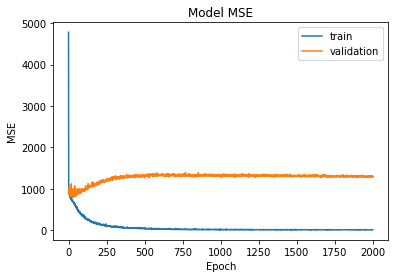

47/47 - 0s - loss: 26.4620 - mse: 1283.7515 - 49ms/epoch - 1ms/step
Model MSE: 1283.75146484375
----------------------------------------
RMSE: 35.82947814996989
RMSE: 16.168612143852943


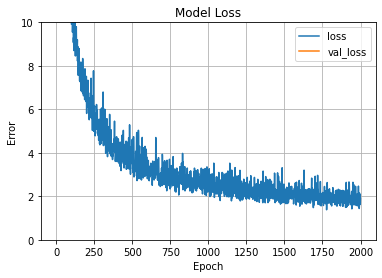

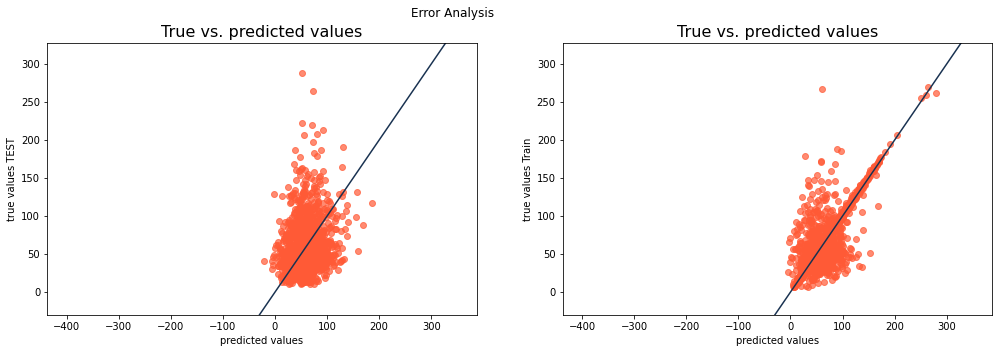

In [28]:
with tf.device('/cpu:0'):
    evaluate(u212_model, u212_history, X_test, y_test, X_train, y_train)

In [ ]:

training_history

In [ ]:


test_results